# Assignment 2: Neural networks for classification

The goal of this assignment is to get familiar with the Keras neural networks API. You will implement a neural network for (non-medical) image classification example — classification of images of handwritten digits, and perform some basic experiments and analysis. 

In this assignment, you will run trough Python code that demonstrates how to train a neural network for handwritten digit recognition. For this purpose, we are going to use the well-known [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

The neural network is implemented in the Keras neural networks API. An overview of the Keras API was given during the introductory lectures. More details can be found in the [Keras API documentation](https://keras.io/).

### Preliminaries

The first step in the implementation is to import all the Python modules that will be used throughout the code:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

Here is a brief description of the modules and functions that are imported:
- NumPy is a Python library for scientific computing. You can think of it as a libarary that implements MATLAB-like functionality in Python, although note that NumPy is not a Matlab clone. This is a NumPy cheatsheat for MATLAB users that you might find useful: https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

- matplotlib.pyplot is a module that provides MATLAB-style plotting in Python. The pyplot documentation can be found here: https://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot

- scikit-learn is a machine learning library for Python. From this library we are going to use the `train_test_split` function that is documented here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- Finally, we import a number of modules from the Keras API.

### Loading the MNIST dataset

The following lines of code use the builtin Keras method to load the MNIST dataset that is already split into training and test sets and then visualizes some example images:


Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


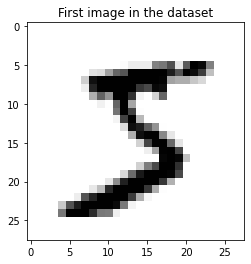

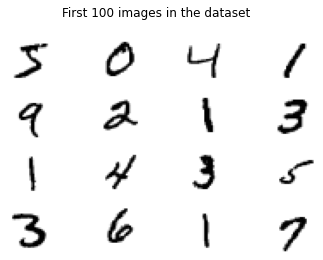

Labels of the first 16 images in the dataset:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [2]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

# show the first image in the dataset
plt.figure()
plt.imshow(X_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title('First image in the dataset')

# show the first 16 images in the dataset in a 4x4 gird
fig = plt.figure()
for n in range(16):
    ax = fig.add_subplot(4, 4, n + 1)
    plt.imshow(X_train[n], cmap='gray_r', vmin=0, vmax=255)   
    plt.axis('off')
fig.suptitle('First 100 images in the dataset')
plt.show()

# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[:16])


### Data preprocessing

The next step is to preprocess the data, i.e. prepare it in a format that will make it easy to train and evaluate machine learning models such as neural networks. The MNIST dataset already is split into a training and validation sets, however, we will also require a validation set to monitor for overfitting (and perform model selection). 

In [3]:
# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)


print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)


print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val.shape)

Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)


We can plot the distribution of the class labels in the new training and validation sets and make sure they are similarly distributed. 

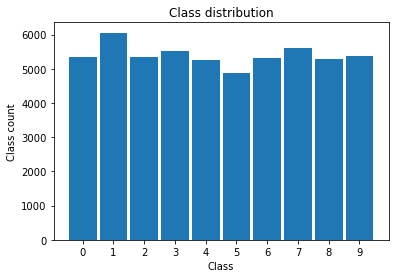

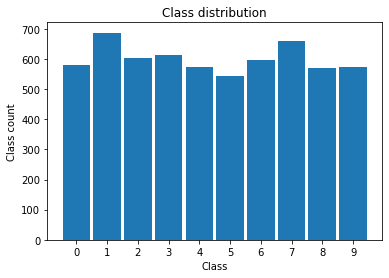

In [4]:
def plt_classes(y, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0,num_class+1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0,num_class))
    plt.title('Class distribution')

    
# show the class label distribution in the training dataset
plt_classes(y_train)

# show the class label distribution in the validation dataset
plt_classes(y_val)

The following lines of code reshape the MNIST dataset to the appropriate format, convert the dataset to float32 data type (from uint8) and finally normalize to the intensity values to the [0, 1] range.

In [5]:
# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

The MNIST classification problem has 10 classes, one for each digit. Thus, the output neural network should have 10 output neurons, each one corresponding to one of the classes. This means that the targets that will be used to train the network must be 10-dimensional vectors so they are directly comparable to the output neurons. This can be achieved by one-hot encoding of the class labels, which is performed in the code below. 

In [6]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train.shape) 


# since we have 10 different classes, what does this array look like?
# let's look at the first 20 labels
print(y_train[:20]) 


# convert 1D class arrays to 10D class matrices
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


# check the output
print(y_train.shape)
# this is now a one-hot encoded matrix
print(y_train[:20]) 

(54000,)
[1 3 9 2 7 8 7 5 9 6 7 6 6 5 1 2 3 5 7 2]
(54000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


### Building a neural network classification model

Now that the input (images) and output (targets) data is prepared, we can proceed to defining the neural network model that will later be trained with the data. Note that we use a sequential Keras model and the first layer of the model flattens the input images (converts them to 1D arrays). 

The neural network consists of one input layer, one hidden layer of 64 neurons activated with a ReLU nonlinearity, and one output layer activated with a softmax nonlinearity. 


In [7]:
model = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model.add(Dense(64, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model.add(Dense(10, activation='softmax')) 

### Training the model

Finally, the model can be trained trained with stochastic gradient descent.

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="my_first_model"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.1671 - accuracy: 0.6717 - val_loss: 0.4238 - val_accuracy: 0.8790
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3754 - accuracy: 0.8976 - val_loss: 0.3470 - val_accuracy: 0.8992
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3095 - accuracy: 0.9142 - val_loss: 0.3131 - val_accuracy: 0.9113
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2840 - accuracy: 0.9177 - val_loss: 0.2884 - val_accuracy: 0.9173
Epoch 5/10
1688/1688 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.92 - 2s 1ms/step - loss: 0.2643 - accuracy: 0.9249 - val_loss: 0.2716 - val_accuracy: 0.9230
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2425 - accuracy: 0.9320 - val_loss: 0.2528 - val_accuracy: 0.9295
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2238 - accuracy:

### Training and validation loss curves in TensorBoard

In the call to the `model.fit()` method, we provided a TensorBoard callback function as a parameter. This function logs the training process. The generated logs can be used to plot the training and validation loss and accuracy curves. 

You can start TensorBoard by calling the following commands from the Anaconda Prompt command line:

````bash
activate 8p361
cd 'path/where/logs/are'
tensorboard --logdir logs
````

This will start TensorBoard. While TensorBoard is running, you can navigate your browser to http://localhost:6006/ to visualize the training and validation loss curves.

If you use different names for your trained models, you can easily compare their loss and accuracy curves in TensorBoard. 

### Evaluate the performance of the trained model

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)


print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.1834513396024704
Accuracy:  0.9470999836921692


### Before you start with the exercises...

While this Python notebook such as this one can be very useful tools for presenting code in an instructive way, they can be a bit inconvenient for performing and keeping track of large number of experiments (such as experiments with different neural network architecture). The Python file `mlp.py` contains all the code from this notebook minus the analysis and visualization experiments. You can use this code as the basis of the experiments you need to perform in the exercises.

## Exercise 1

The example neural network classification model in this assignment is relatively simple — it contains a single hidden layer of 64 neurons. 

Perform a set of experiments with more complex models, e.g. with more layers (deeper models), more neurons per layer or a combination. 

Describe the set of experiments that you have performed. What is the accuracy of the best model? How did you determine which model is the best?


## Exercise 2

Compare the performance of the following three models:
1. Neural netowrk without any hidden layers (the input layer connects directly to the output layer).
2. Neural network with 3 hidden layers with ReLU activations.
3. Neural network with 3 hidden layers with linear activations (i.e. without nonlinearities between the layers). 

Analyze the performance of the three models. What is the reason behind the difference in performance between the second and third models?

## Exercise 3

Train a neural network model (the specific architecture is up to you) for a four class classification problem derived from MNIST in the following way:

- "vertical digits": 1, 7
- "loopy digits": 0, 6, 8, 9
- "curly digits": 2, 5
- "other": 3, 4

## Submission checklist

- Exercise 1: Answers to the questions and code
- Exercise 2: Answers to the questions and code
- Exercise 3: Code



# Answer exercise 1

Create model with 3 layers with 64 neurons each:

In [10]:
model1 = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model1.add(Flatten(input_shape=(28,28,1))) 
# fully connected 1st layer with 64 neurons and ReLU nonlinearity
model1.add(Dense(64, activation='relu'))
# fully connected 2nd layer with 64 neurons and ReLU nonlinearity
model1.add(Dense(64, activation='relu'))
# fully connected 3rd layer with 64 neurons and ReLU nonlinearity
model1.add(Dense(64, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model1.add(Dense(10, activation='softmax')) 

In [11]:
# compile the model
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="model_ex_1_1"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model1.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.2509 - accuracy: 0.6193 - val_loss: 0.3835 - val_accuracy: 0.8878
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3227 - accuracy: 0.9064 - val_loss: 0.3138 - val_accuracy: 0.9062
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2482 - accuracy: 0.9286 - val_loss: 0.2441 - val_accuracy: 0.9300
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2096 - accuracy: 0.9399 - val_loss: 0.2435 - val_accuracy: 0.9340
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1841 - accuracy: 0.9450 - val_loss: 0.1960 - val_accuracy: 0.9420
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1657 - accuracy: 0.9519 - val_loss: 0.1740 - val_accuracy: 0.9475
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1496 - accuracy: 0.9567 - val_loss: 0.1619 - val_accuracy:

In [12]:
score = model1.evaluate(X_test, y_test, verbose=0)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.12809370458126068
Accuracy:  0.9602000117301941


Create model with 1 layer with 32 neurons each:

In [13]:
model2 = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model2.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 32 neurons and ReLU nonlinearity
model2.add(Dense(32, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model2.add(Dense(10, activation='softmax')) 

In [14]:
# compile the model
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="model_ex_1_2"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model2.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.2327 - accuracy: 0.6368 - val_loss: 0.4499 - val_accuracy: 0.8778
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4024 - accuracy: 0.8876 - val_loss: 0.3679 - val_accuracy: 0.8957
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3292 - accuracy: 0.9056 - val_loss: 0.3305 - val_accuracy: 0.9068
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3004 - accuracy: 0.9143 - val_loss: 0.3064 - val_accuracy: 0.9153
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2792 - accuracy: 0.9207 - val_loss: 0.2900 - val_accuracy: 0.9202
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9281 - val_loss: 0.2745 - val_accuracy: 0.9243
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2464 - accuracy: 0.9320 - val_loss: 0.2602 - val_accuracy:

In [15]:
score = model2.evaluate(X_test, y_test, verbose=0)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.20980432629585266
Accuracy:  0.9399999976158142


Create model with 2 layers with 64 neurons and 1 layer with 32 neurons:

In [16]:
model3 = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model3.add(Flatten(input_shape=(28,28,1))) 
# fully connected 1st layer with 64 neurons and ReLU nonlinearity
model3.add(Dense(64, activation='relu'))
# fully connected 2nd layer with 64 neurons and ReLU nonlinearity
model3.add(Dense(64, activation='relu'))
# fully connected 3rd layer with 32 neurons and ReLU nonlinearity
model3.add(Dense(32, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model3.add(Dense(10, activation='softmax')) 

In [17]:
# compile the model
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="model_ex_1_3"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model3.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.3574 - accuracy: 0.5701 - val_loss: 0.3613 - val_accuracy: 0.8938
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3226 - accuracy: 0.9072 - val_loss: 0.2861 - val_accuracy: 0.9192
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2515 - accuracy: 0.9277 - val_loss: 0.2397 - val_accuracy: 0.9292
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2172 - accuracy: 0.9362 - val_loss: 0.2135 - val_accuracy: 0.9387
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1825 - accuracy: 0.9471 - val_loss: 0.1951 - val_accuracy: 0.9448
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1603 - accuracy: 0.9539 - val_loss: 0.1758 - val_accuracy: 0.9485
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1491 - accuracy: 0.9552 - val_loss: 0.1590 - val_accuracy:

In [18]:
score = model3.evaluate(X_test, y_test, verbose=0)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.12001217156648636
Accuracy:  0.9653000235557556


Best model = model with the lowest loss value (=error) and highest accuaracy.

# Answer exercise 2

Neural netowrk without any hidden layers (the input layer connects directly to the output layer).

In [19]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28,1))) 
model4.add(Dense(10, activation='softmax')) 

In [20]:
# compile the model
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="model_ex_2_1"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model4.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.1828 - accuracy: 0.6985 - val_loss: 0.5388 - val_accuracy: 0.8640
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4890 - accuracy: 0.8758 - val_loss: 0.4534 - val_accuracy: 0.8778
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4216 - accuracy: 0.8873 - val_loss: 0.4175 - val_accuracy: 0.8842
Epoch 4/10
1688/1688 [==============================] - 2s 964us/step - loss: 0.3860 - accuracy: 0.8951 - val_loss: 0.3966 - val_accuracy: 0.8893
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8971 - val_loss: 0.3822 - val_accuracy: 0.8932
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3547 - accuracy: 0.9028 - val_loss: 0.3720 - val_accuracy: 0.8947
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3442 - accuracy: 0.9048 - val_loss: 0.3635 - val_accurac

In [21]:
score = model4.evaluate(X_test, y_test, verbose=0)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.31065380573272705
Accuracy:  0.9151999950408936


Neural network with 3 hidden layers with ReLU activations.

In [22]:
model5 = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model5.add(Flatten(input_shape=(28,28,1))) 
# fully connected 1st layer with 64 neurons and ReLU nonlinearity
model5.add(Dense(64, activation='relu'))
# fully connected 2nd layer with 64 neurons and ReLU nonlinearity
model5.add(Dense(64, activation='relu'))
# fully connected 3rd layer with 64 neurons and ReLU nonlinearity
model5.add(Dense(64, activation='relu'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model5.add(Dense(10, activation='softmax')) 

In [23]:
# compile the model
model5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="model_ex_2_2"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model5.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.3051 - accuracy: 0.6093 - val_loss: 0.3657 - val_accuracy: 0.8908
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3140 - accuracy: 0.9092 - val_loss: 0.2645 - val_accuracy: 0.9212
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2397 - accuracy: 0.9309 - val_loss: 0.2211 - val_accuracy: 0.9352
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2051 - accuracy: 0.9418 - val_loss: 0.1880 - val_accuracy: 0.9442
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1696 - accuracy: 0.9496 - val_loss: 0.1746 - val_accuracy: 0.9467
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1568 - accuracy: 0.9532 - val_loss: 0.1585 - val_accuracy: 0.9548
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1420 - accuracy: 0.9592 - val_loss: 0.1453 - val_accuracy:

In [24]:
score = model5.evaluate(X_test, y_test, verbose=0)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.12106390297412872
Accuracy:  0.9613999724388123


Neural network with 3 hidden layers with linear activations (i.e. without nonlinearities between the layers).

In [25]:
model6 = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model6.add(Flatten(input_shape=(28,28,1))) 
# fully connected 1st layer with 64 neurons and ReLU nonlinearity
model6.add(Dense(64, activation='linear'))
# fully connected 2nd layer with 64 neurons and ReLU nonlinearity
model6.add(Dense(64, activation='linear'))
# fully connected 3rd layer with 64 neurons and ReLU nonlinearity
model6.add(Dense(64, activation='linear'))
# output layer with 10 nodes (one for each class) and softmax nonlinearity
model6.add(Dense(10, activation='softmax')) 

In [26]:
# compile the model
model6.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="model_ex_2_3"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model6.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.8044 - accuracy: 0.7772 - val_loss: 0.3677 - val_accuracy: 0.8917
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3291 - accuracy: 0.9070 - val_loss: 0.3323 - val_accuracy: 0.9055
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3065 - accuracy: 0.9142 - val_loss: 0.3141 - val_accuracy: 0.9142
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.9177 - val_loss: 0.3137 - val_accuracy: 0.9075
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.9201 - val_loss: 0.3155 - val_accuracy: 0.9082
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.9209 - val_loss: 0.3067 - val_accuracy: 0.9142
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2782 - accuracy: 0.9222 - val_loss: 0.3059 - val_accuracy:

In [27]:
score = model6.evaluate(X_test, y_test, verbose=0)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.27512621879577637
Accuracy:  0.9223999977111816


Analyze the performance of the three models. What is the reason behind the difference in performance between the second and third models?

The loss value for the third experiment is about 2.5 times higher compared to the second experiment. It also has a lower accuracy value. Combination of ReLu layers will be more accurate than linear layers. 
--> More explanation needed

# Answer exercise 3

Train a neural network model (the specific architecture is up to you) for a four class classification problem derived from MNIST in the following way:

- "vertical digits": 1, 7
- "loopy digits": 0, 6, 8, 9
- "curly digits": 2, 5
- "other": 3, 4

Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


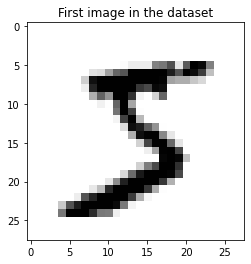

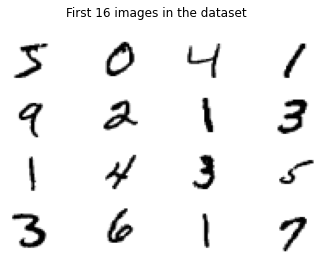

Labels of the first 16 images in the dataset:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [28]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

# show the first image in the dataset
plt.figure()
plt.imshow(X_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title('First image in the dataset')

# show the first 16 images in the dataset in a 4x4 gird
fig = plt.figure()
for n in range(16):
    ax = fig.add_subplot(4, 4, n + 1)
    plt.imshow(X_train[n], cmap='gray_r', vmin=0, vmax=255)   
    plt.axis('off')
fig.suptitle('First 16 images in the dataset')
plt.show()

# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[:16])

In [29]:
y_train_new = np.array([]).astype('uint8')
for i,item in enumerate(y_train):
    if item == 1 or item == 7 :
        y_train_new = np.append(y_train_new,["vertical digits"],0)
    elif item == 0 or item == 6 or item == 8 or item == 9 :
        y_train_new = np.append(y_train_new,["loopy digits"],0)
    elif item == 2 or item == 5 :
        y_train_new = np.append(y_train_new,["curly digits"],0)
    elif item == 3 or item == 4 :
        y_train_new = np.append(y_train_new,["other"],0)
y_train_new

array(['curly digits', 'loopy digits', 'other', ..., 'curly digits',
       'loopy digits', 'loopy digits'], dtype='<U15')

In [30]:
y_test_new = np.array([]).astype('uint8')
for i,item in enumerate(y_test):
    if item == 1 or item == 7 :
        y_test_new = np.append(y_test_new,["vertical digits"],0)
    elif item == 0 or item == 6 or item == 8 or item == 9 :
        y_test_new = np.append(y_test_new,["loopy digits"],0)
    elif item == 2 or item == 5 :
        y_test_new = np.append(y_test_new,["curly digits"],0)
    elif item == 3 or item == 4 :
        y_test_new = np.append(y_test_new,["other"],0)
y_test_new

array(['vertical digits', 'curly digits', 'vertical digits', ..., 'other',
       'curly digits', 'loopy digits'], dtype='<U15')

In [31]:
# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train_new, y_val = train_test_split(y_train_new, test_size=0.10, random_state=101)


print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train_new.shape)


print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val.shape)

Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)


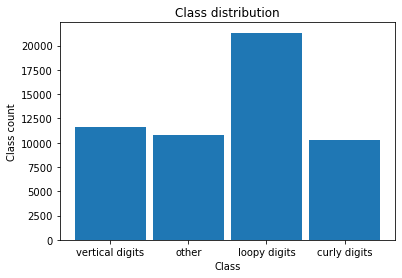

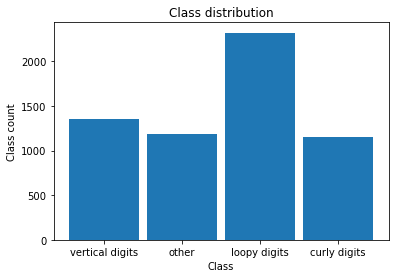

In [32]:
def plt_classes(y, num_class=4):
    plt.figure()
    plt.hist(y, bins=range(0,num_class+1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0,num_class))
    plt.title('Class distribution')

    
# show the class label distribution in the training dataset
plt_classes(y_train_new)

# show the class label distribution in the validation dataset
plt_classes(y_val)

In [33]:
# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

In [34]:
vertical_digits = int(0)
loopy_digits = int(1)
curly_digits = int(2)
other = int(3)

In [35]:
y_train_new_class = []
for i, item in enumerate(y_train_new):
    if item == "vertical digits":
        y_train_new_class.append(vertical_digits)
    elif item == "loopy digits":
        y_train_new_class.append(loopy_digits)
    elif item == "curly digits":
        y_train_new_class.append(curly_digits)
    elif item == "other":
        y_train_new_class.append(other)
#y_train_new_class

In [36]:
y_val_new_class = []
for i, item in enumerate(y_val):
    if item == "vertical digits":
        y_val_new_class.append(vertical_digits)
    elif item == "loopy digits":
        y_val_new_class.append(loopy_digits)
    elif item == "curly digits":
        y_val_new_class.append(curly_digits)
    elif item == "other":
        y_val_new_class.append(other)
#y_val_new_class

In [37]:
y_test_new_class = []
for i, item in enumerate(y_test_new):
    if item == "vertical digits":
        y_test_new_class.append(vertical_digits)
    elif item == "loopy digits":
        y_test_new_class.append(loopy_digits)
    elif item == "curly digits":
        y_test_new_class.append(curly_digits)
    elif item == "other":
        y_test_new_class.append(other)
#y_test_new_class

In [38]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train_new.shape) 


# since we have 10 different classes, what does this array look like?
# let's look at the first 20 labels
print(y_train_new[:20]) 

# convert 1D class arrays to 10D class matrices
y_train_new = to_categorical(y_train_new_class, 4)
y_val_new = to_categorical(y_val_new_class, 4)
y_test_new = to_categorical(y_test_new_class, 4)


# check the output
print(y_train_new.shape)
# this is now a one-hot encoded matrix
print(y_train_new[:20]) 

(54000,)
['vertical digits' 'other' 'loopy digits' 'curly digits' 'vertical digits'
 'loopy digits' 'vertical digits' 'curly digits' 'loopy digits'
 'loopy digits' 'vertical digits' 'loopy digits' 'loopy digits'
 'curly digits' 'vertical digits' 'curly digits' 'other' 'curly digits'
 'vertical digits' 'curly digits']
(54000, 4)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [39]:
model_class = Sequential()
# flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
model_class.add(Flatten(input_shape=(28,28,1))) 
# fully connected layer with 64 neurons and ReLU nonlinearity
model_class.add(Dense(64, activation='relu'))
# output layer with 4 nodes (one for each class) and softmax nonlinearity
model_class.add(Dense(4, activation='softmax')) 

In [40]:
# compile the model
model_class.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# use this variable to name your model
model_name="model_class_test1"

# create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_name))

# train the model
model_class.fit(X_train, y_train_new, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_new), callbacks=[tensorboard])

Epoch 1/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.7712 - accuracy: 0.7051 - val_loss: 0.4098 - val_accuracy: 0.8673
Epoch 2/10
1688/1688 [==============================] - 2s 999us/step - loss: 0.3625 - accuracy: 0.8841 - val_loss: 0.3191 - val_accuracy: 0.8975
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2724 - accuracy: 0.9152 - val_loss: 0.2647 - val_accuracy: 0.9208
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2273 - accuracy: 0.9316 - val_loss: 0.2327 - val_accuracy: 0.9295
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2030 - accuracy: 0.9383 - val_loss: 0.2141 - val_accuracy: 0.9343
Epoch 6/10
1688/1688 [==============================] - 2s 999us/step - loss: 0.1829 - accuracy: 0.9434 - val_loss: 0.1957 - val_accuracy: 0.9402
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1653 - accuracy: 0.9495 - val_loss: 0.1890 - val_accur

In [41]:
score = model_class.evaluate(X_test, y_test_new, verbose=0)


print("Loss: ",score[0])
print("Accuracy: ",score[1])

Loss:  0.14019961655139923
Accuracy:  0.9550999999046326
